# Image classification with Sift features

In [1]:
import cv2
import numpy as np
import pandas as pd
import glob
import os
from sklearn.cluster import MiniBatchKMeans
import scipy.cluster.vq as vq
from sklearn import svm
import random
import os.path
from tqdm import tqdm
from skimage import transform

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data_dir = 'dataset/train/'
test_data_dir = 'dataset/test/'
df = pd.DataFrame.from_csv("dataset/gt_train.csv")
df.set_index = 'filename'

### Class distribution

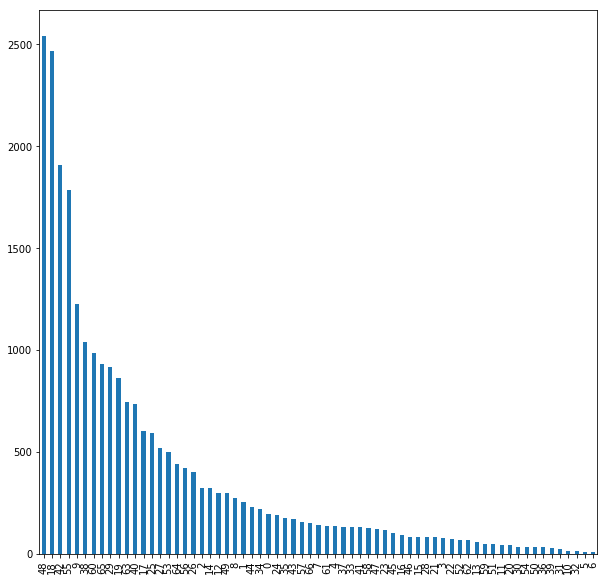

In [3]:
counts = df["class_number"].value_counts()
counts.plot.bar(figsize=(10,10))


### Data augmentation

In [4]:
import warnings; warnings.simplefilter('ignore')

imgs = []
correct_labels = []
n = 2500
for i in tqdm(range(67)):
    names_class_i = list(df[df["class_number"] == i].index)
    if len(names_class_i) > n:
        names_class_i = random.sample(names_class_i, n)
        imgs += [cv2.imread(train_data_dir+name) for name in names_class_i]
        correct_labels += [i]*n
    else:
        class_imgs = [cv2.imread(train_data_dir+name) for name in names_class_i]
        augm_imgs = []
        while (len(augm_imgs) + len(class_imgs))< n:
            for class_img in class_imgs:
                img1 = transform.rotate(class_img, random.uniform(-5, 5), mode='symmetric') * 255
                img2 = transform.pyramid_reduce(class_img, sigma=random.uniform(0, 1)) * 255
                img3 = transform.pyramid_expand(class_img, sigma=random.uniform(0, 1)) * 255
                img4 = transform.rescale(class_img, random.uniform(0.9, 1)) * 255
                augm_imgs += [img1.astype(np.uint8), img2.astype(np.uint8), img3.astype(np.uint8), img4.astype(np.uint8)]
        imgs += class_imgs
        imgs += random.sample(augm_imgs, n-len(class_imgs))
        correct_labels += [i]*n
        
print(len(correct_labels), len(imgs))

100%|██████████| 67/67 [03:31<00:00,  3.16s/it]

167500 167500


### Build SIFT descriptors

In [5]:
sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.02)
num_clusters = 150
kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=100, max_iter=250)

In [6]:
def get_sift_descriptors(img):
    kp, desc =  sift.detectAndCompute(img, None)
    if desc is None:
        print(False)
        return None
    num_elems = min(100, len(desc))
    return random.sample(list(desc), num_elems)

def build_dataset(list_of_images):
    image_to_descriptors = []
    for i, image in zip(tqdm(range(len(list_of_images))), list_of_images):
        image_to_descriptors.append(get_sift_descriptors(image))
    return image_to_descriptors

In [7]:
image_to_descriptors = build_dataset(imgs)

 14%|█▍        | 24007/167500 [01:05<06:33, 364.58it/s]

False


 18%|█▊        | 30532/167500 [01:26<06:26, 354.82it/s]

False


 26%|██▌       | 43246/167500 [02:05<05:59, 345.72it/s]

False


 26%|██▋       | 44320/167500 [02:08<05:56, 345.89it/s]

False


 27%|██▋       | 44604/167500 [02:08<05:55, 346.07it/s]

False


 29%|██▉       | 48704/167500 [02:21<05:44, 344.50it/s]

False


 41%|████      | 68452/167500 [03:14<04:41, 352.20it/s]

False


 41%|████▏     | 69360/167500 [03:17<04:38, 351.88it/s]

False


 44%|████▍     | 73755/167500 [03:26<04:22, 357.25it/s]

False


 45%|████▍     | 74600/167500 [03:28<04:19, 358.36it/s]

False


 55%|█████▌    | 92774/167500 [04:16<03:26, 361.20it/s]

False


 56%|█████▌    | 93163/167500 [04:17<03:25, 361.71it/s]

False
False


 56%|█████▌    | 93666/167500 [04:18<03:23, 362.27it/s]

False


 56%|█████▌    | 93983/167500 [04:19<03:22, 362.61it/s]

False


 56%|█████▌    | 94148/167500 [04:19<03:22, 362.82it/s]

False


 57%|█████▋    | 94718/167500 [04:20<03:20, 363.51it/s]

False


 58%|█████▊    | 96650/167500 [04:24<03:13, 365.40it/s]

False


 58%|█████▊    | 97871/167500 [04:27<03:10, 365.83it/s]

False
False


 59%|█████▊    | 98052/167500 [04:27<03:09, 365.93it/s]

False
False


 59%|█████▊    | 98187/167500 [04:28<03:09, 366.00it/s]

False


 59%|█████▉    | 98439/167500 [04:28<03:08, 366.01it/s]

False


 59%|█████▉    | 98685/167500 [04:29<03:08, 365.83it/s]

False


 59%|█████▉    | 99302/167500 [04:31<03:06, 365.96it/s]

False


 59%|█████▉    | 99377/167500 [04:31<03:06, 365.82it/s]

False


 59%|█████▉    | 99501/167500 [04:32<03:05, 365.65it/s]

False


 59%|█████▉    | 99576/167500 [04:32<03:05, 365.66it/s]

False
False


 60%|█████▉    | 99838/167500 [04:33<03:05, 365.64it/s]

False


 60%|█████▉    | 100039/167500 [04:33<03:04, 365.55it/s]

False
False


 61%|██████    | 101854/167500 [04:38<02:59, 365.58it/s]

False


 61%|██████▏   | 102840/167500 [04:41<02:56, 365.88it/s]

False
False


 62%|██████▏   | 103357/167500 [04:42<02:55, 366.01it/s]

False


 62%|██████▏   | 103429/167500 [04:42<02:55, 365.99it/s]

False


 62%|██████▏   | 104174/167500 [04:44<02:53, 366.01it/s]

False
False


 62%|██████▏   | 104672/167500 [04:45<02:51, 366.28it/s]

False


 63%|██████▎   | 104868/167500 [04:46<02:51, 366.25it/s]

False


 65%|██████▍   | 108586/167500 [04:55<02:40, 367.26it/s]

False


 65%|██████▌   | 108894/167500 [04:56<02:39, 367.33it/s]

False


 65%|██████▌   | 109272/167500 [04:57<02:38, 367.43it/s]

False
False
False


 66%|██████▌   | 109822/167500 [04:58<02:36, 367.73it/s]

False


 66%|██████▌   | 109955/167500 [04:58<02:36, 367.78it/s]

False


 66%|██████▌   | 110045/167500 [04:59<02:36, 367.80it/s]

False


 69%|██████▉   | 115575/167500 [05:12<02:20, 369.58it/s]

False


 70%|██████▉   | 116642/167500 [05:15<02:17, 370.23it/s]

False
False
False


 70%|███████   | 117500/167500 [05:16<02:14, 370.72it/s]

False


 70%|███████   | 118013/167500 [05:18<02:13, 370.34it/s]

False


 71%|███████   | 118276/167500 [05:19<02:12, 370.32it/s]

False


 71%|███████   | 118450/167500 [05:19<02:12, 370.38it/s]

False


 71%|███████   | 118572/167500 [05:20<02:12, 370.38it/s]

False


 71%|███████   | 118688/167500 [05:20<02:11, 370.35it/s]

False


 71%|███████▏  | 119740/167500 [05:23<02:09, 369.82it/s]

False


 74%|███████▎  | 123180/167500 [05:34<02:00, 368.38it/s]

False


 78%|███████▊  | 130848/167500 [05:52<01:38, 371.21it/s]

False


 78%|███████▊  | 131457/167500 [05:53<01:37, 371.49it/s]

False


 79%|███████▉  | 131943/167500 [05:54<01:35, 371.76it/s]

False


 80%|████████  | 134220/167500 [05:59<01:29, 373.34it/s]

False


 96%|█████████▋| 161403/167500 [06:57<00:15, 386.71it/s]

False


100%|██████████| 167500/167500 [07:12<00:00, 387.72it/s]


In [8]:
indexes = [i for i, desc in enumerate(image_to_descriptors) if desc is None]
image_to_descriptors = [desc for i, desc in enumerate(image_to_descriptors) if i not in indexes]
correct_labels = [cl for i, cl in enumerate(correct_labels) if i not in indexes]
list_of_sift_descriptors = np.vstack(image_to_descriptors)

In [9]:
print(len(image_to_descriptors), len(correct_labels))

167433 167433


### Clustering

In [10]:
from time import time
t0 = time()
kmeans.fit(list_of_sift_descriptors)
print('Min:', (time()-t0)/60)

Min: 2.501546895503998


### Build histograms

In [12]:
def create_histogram(labels):
    hist, edges = np.histogram(labels, bins=range(num_clusters), normed=True)
    return hist

all_image_histograms = []
for i, desc in zip(tqdm(range(len(image_to_descriptors))), image_to_descriptors):
    labels = kmeans.predict(desc)
    all_image_histograms.append(create_histogram(labels))

100%|██████████| 167433/167433 [01:43<00:00, 1612.76it/s]


### Image classification

In [13]:
from time import time
from sklearn.neural_network import MLPClassifier

t0 = time()
classifier = MLPClassifier(hidden_layer_sizes=(200,100,))
classifier.fit(all_image_histograms, correct_labels)
print('Min:', (time()-t0)/60)

Min: 28.17061810096105


In [14]:
def classify_images(svm, all_image_histograms):
    labels = []
    for i, target_hist in zip(tqdm(range(len(all_image_histograms))), all_image_histograms):
        labels.append(classifier.predict([target_hist]))
        
    return labels

def test_classification(predicted_labels, trained_labels):
    total_correct = 0
    for elem1, elem2 in zip(predicted_labels, trained_labels):
        if elem1[0] == elem2:
            total_correct += 1
    return total_correct / len(predicted_labels)

predicted_labels = classify_images(classifier, all_image_histograms)
trained_labels = correct_labels

100%|██████████| 167433/167433 [00:27<00:00, 6156.41it/s]


In [15]:
accuracy = test_classification(predicted_labels, trained_labels)
print("Train accurasy:", accuracy)

Train accurasy: 0.9361535659039736


### Predict test images

In [16]:
test_paths = [test_data_dir+x for x in sorted(os.listdir(test_data_dir))]
test_images = []
for path in test_paths:
    test_image = cv2.imread(path)
    test_images.append(test_image)
test_images = np.array(test_images)

labels = []
for i, test_image in zip(tqdm(range(len(test_images))), test_images):
    desc = get_sift_descriptors(test_image)
    if desc:
        target_hist = create_histogram((kmeans.predict(desc)))
    else:
        target_hist = np.zeros_like(target_hist)
    labels.append(classifier.predict([target_hist]))

 18%|█▊        | 1378/7551 [00:04<00:21, 290.36it/s]

False


100%|██████████| 7551/7551 [00:27<00:00, 270.85it/s]


In [17]:
answers = [x[0] for x in labels]
print(len(answers), len(test_paths))

7551 7551


In [18]:
data = list(zip(sorted(os.listdir(test_data_dir)), answers))
df_res = pd.DataFrame(data, columns=["filename","class_number"])
df_res = df_res.set_index('filename')

df_res.to_csv("1_classic.csv")
df_res.head()

,class_number
filename,
000000.png,66
000001.png,56
000002.png,22
000003.png,9
000004.png,2


# Image Classification With NN

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os

Using TensorFlow backend.


In [20]:
img_width, img_height = 48, 48
input_shape = (img_width, img_height, 3)

train_data_dir = 'dataset/train/'
test_data_dir = 'dataset/test/'
nb_train_samples = len(os.listdir(train_data_dir))
nb_test_samples = len(os.listdir(test_data_dir))
epochs = 10
batch_size = 16
num_classes = 67
print(nb_train_samples, nb_test_samples)

25432 7551


In [21]:
img_paths = sorted([train_data_dir + x for x in os.listdir(train_data_dir)])
X = []
for path in img_paths:
    X.append(cv2.imread(path))
X = np.array(X)
y = df["class_number"].as_matrix()

In [22]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.005)
y_train = np_utils.to_categorical(y_train.reshape((-1, 1)), num_classes)
y_validation = np_utils.to_categorical(y_validation.reshape((-1, 1)), num_classes)

print(X_validation.shape)
print(y_validation.shape)

(128, 48, 48, 3)
(128, 67)


### Define the model

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(67))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
__________

In [24]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Define Image Data Generator for train and test

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=0.05,
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,
    height_shift_range = 0.1,
    width_shift_range = 0.1,
    fill_mode="nearest",
    )

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    )

validation_generator = test_datagen.flow(
    x=X_validation,
    y=y_validation,
    batch_size=batch_size,
    )

### Train

In [26]:
nb_train_samples = len(y_train)
nb_validation_samples = len(y_validation)
print(nb_train_samples, nb_validation_samples)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

25304 128
Epoch 1/10
1581/1581 [==============================] - 72s - loss: 0.0224 - acc: 0.9935 - val_loss: 0.0078 - val_acc: 0.9976
Epoch 2/10
1581/1581 [==============================] - 71s - loss: 0.0112 - acc: 0.9968 - val_loss: 0.0086 - val_acc: 0.9977
Epoch 3/10
1581/1581 [==============================] - 71s - loss: 0.0097 - acc: 0.9973 - val_loss: 0.0028 - val_acc: 0.9990
Epoch 4/10
1581/1581 [==============================] - 70s - loss: 0.0090 - acc: 0.9975 - val_loss: 0.0070 - val_acc: 0.9978
Epoch 5/10
1581/1581 [==============================] - 71s - loss: 0.0090 - acc: 0.9975 - val_loss: 0.0058 - val_acc: 0.9980
Epoch 6/10
1581/1581 [==============================] - 71s - loss: 0.0087 - acc: 0.9977 - val_loss: 0.0066 - val_acc: 0.9986
Epoch 7/10
1581/1581 [==============================] - 70s - loss: 0.0088 - acc: 0.9976 - val_loss: 0.0060 - val_acc: 0.9986
Epoch 8/10
1581/1581 [==============================] - 71s - loss: 0.0090 - acc: 0.9976 - val_loss: 0.0081 

### Test prediction

In [28]:
test_paths = [test_data_dir+x for x in sorted(os.listdir(test_data_dir))]
test_images = []
for path in test_paths:
    test_image = cv2.imread(path)
    test_images.append(test_image)
test_images = np.array(test_images)


In [29]:
result = model.predict(test_images)
answers = list(map(np.argmax, result))
data = list(zip(sorted(os.listdir(test_data_dir)), answers))
df_res = pd.DataFrame(data, columns=["filename","class_number"])
df_res = df_res.set_index('filename')

df_res.to_csv("1_neural.csv")
df_res.head()

,class_number
filename,
000000.png,66
000001.png,66
000002.png,8
000003.png,8
000004.png,8


### Results

In [30]:
def show(img):
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [40]:
i = 1

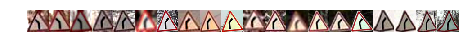

In [41]:
names_train = list(df[df["class_number"] == i].head(20).index)
imgs = [cv2.imread(train_data_dir+name) for name in names_train]

img_stacked = np.hstack(imgs)
show(img_stacked)   

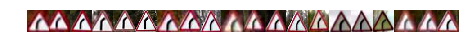

In [42]:
names_test = list(df_res[df_res["class_number"] == i].head(20).index)
imgs = [cv2.imread(test_data_dir+name) for name in names_test]

img_stacked = np.hstack(imgs)
show(img_stacked)